1 - #Preparando o Ambiente

In [ ]:
# !pip install SQLAlchemy==1.4.23
# !pip install pandas==1.5.2

In [ ]:
import os
import requests
import zipfile
import pandas as pd
import io

In [ ]:
# Especificar o nome do arquivo zip
nome_arquivo_zip = 'pesquisa_preferencias.zip'

# Lista para armazenar os DataFrames
dfs = []

# Abrir o arquivo zip
with zipfile.ZipFile(nome_arquivo_zip, 'r') as zip_ref:
    # Iterar sobre os arquivos dentro do zip
    for nome_arquivo in zip_ref.namelist():
        if nome_arquivo.endswith('.csv'):
            # Ler o conteúdo do arquivo
            with zip_ref.open(nome_arquivo) as file:
                # Converter o conteúdo para DataFrame
                df = pd.read_csv(file, encoding='latin1', sep='|')
                dfs.append(df)

# Concatenar os DataFrames em um único DataFrame, se necessário
df = pd.concat(dfs, ignore_index=True)

# Exibir o DataFrame final
print(df)


'''
Este código irá ler todos os arquivos CSV dentro do arquivo zip 'pesquisa_preferencias.zip', converter cada um deles em um DataFrame e, em seguida, concatenar todos os DataFrames em um único DataFrame final, se necessário.
Certifique-se de ajustar o separador (sep) e a codificação (encoding) conforme necessário para os seus arquivos CSV.
'''


      cod_pessoa data_coleta     genero data_nascimento animal_estimacao  \
0       10141743  2020-01-01  Masculino      1981-04-25            peixe   
1       10141860  2020-01-01   Feminino      1966-01-19            peixe   
2       10142548  2020-01-01  Masculino      1973-08-02        tartaruga   
3       10142591  2020-01-01  Masculino      1997-03-05             gato   
4       10142654  2020-01-01   Feminino      1969-08-05        tartaruga   
...          ...         ...        ...             ...              ...   
2122    10142475  2020-12-31  Masculino      1955-05-30            peixe   
2123    10142522  2020-12-31  Masculino      1954-12-22            peixe   
2124    10142881  2020-12-31  Masculino      1952-07-30             gato   
2125    10143184  2020-12-31  Masculino      1984-06-05        tartaruga   
2126    10143307  2020-12-31  Masculino      1971-08-29        tartaruga   

         clima bebida_favorita             hobbies  
0         frio         Cerveja    

"\nEste código irá ler todos os arquivos CSV dentro do arquivo zip 'pesquisa_preferencias.zip', converter cada um deles em um DataFrame e, em seguida, concatenar todos os DataFrames em um único DataFrame final, se necessário. \nCertifique-se de ajustar o separador (sep) e a codificação (encoding) conforme necessário para os seus arquivos CSV.\n"

In [ ]:
df.head()

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies
0,10141743,2020-01-01,Masculino,1981-04-25,peixe,frio,Cerveja,Praticar esporte
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV
2,10142548,2020-01-01,Masculino,1973-08-02,tartaruga,frio,Café,Ler livros
3,10142591,2020-01-01,Masculino,1997-03-05,gato,moderado,Cerveja,Aprender algo novo
4,10142654,2020-01-01,Feminino,1969-08-05,tartaruga,moderado,Café,Assistir TV


In [ ]:
data_ref = pd.to_datetime('2024-03-05')

In [ ]:
df.shape

(2127, 8)

In [ ]:
# Aplicando a conversão na variável DataNascimento
df['data_nascimento'] = df['data_nascimento'].astype('datetime64[ns]')

In [ ]:
df.dtypes

cod_pessoa                   int64
data_coleta                 object
genero                      object
data_nascimento     datetime64[ns]
animal_estimacao            object
clima                       object
bebida_favorita             object
hobbies                     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cod_pessoa        2127 non-null   int64         
 1   data_coleta       2127 non-null   object        
 2   genero            2127 non-null   object        
 3   data_nascimento   2127 non-null   datetime64[ns]
 4   animal_estimacao  2127 non-null   object        
 5   clima             2127 non-null   object        
 6   bebida_favorita   2127 non-null   object        
 7   hobbies           2127 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 133.1+ KB


In [ ]:
df.isnull().count()

cod_pessoa          2127
data_coleta         2127
genero              2127
data_nascimento     2127
animal_estimacao    2127
clima               2127
bebida_favorita     2127
hobbies             2127
dtype: int64

In [ ]:
duplicados = df.duplicated().sum()
print(duplicados)


0


##Análises

Qual é o animal de estimação de maior preferência entre as mulheres?


In [ ]:
df['genero'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [ ]:
df_mulheres = df[df['genero'] == 'Feminino']
df_mulheres

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV
4,10142654,2020-01-01,Feminino,1969-08-05,tartaruga,moderado,Café,Assistir TV
5,10141523,2020-01-02,Feminino,1998-09-24,gato,quente,Cerveja,Aprender algo novo
6,10141996,2020-01-02,Feminino,1973-03-13,tartaruga,quente,refrigerante,Escrever
7,10142089,2020-01-02,Feminino,1970-03-23,gato,moderado,Água,Pintar quadros
...,...,...,...,...,...,...,...,...
2109,10141656,2020-12-29,Feminino,1981-12-27,peixe,moderado,Água,Praticar esporte
2111,10142003,2020-12-29,Feminino,1987-05-04,cachorro,quente,Cerveja,Escutar música
2112,10142040,2020-12-29,Feminino,1978-09-11,peixe,moderado,Água,Ler livros
2113,10142621,2020-12-29,Feminino,1981-11-18,cachorro,moderado,Vinho,Ler livros


In [ ]:
preferencias = df_mulheres['animal_estimacao'].value_counts()
animal_preferido = preferencias.idxmax()

print(preferencias)
print(animal_preferido)

gato         279
peixe        158
tartaruga    149
cachorro     143
Name: animal_estimacao, dtype: int64
gato


Qual é a soma das pessoas que gostam de cachorro ou gato?


In [ ]:
preferencia = df[(df['animal_estimacao'] == 'cachorro') | (df['animal_estimacao'] == 'gato')]
preferencia.shape

(1278, 8)

Quantos homens preferem o clima frio?


In [ ]:
df['clima'].unique()

array(['frio', 'quente', 'moderado'], dtype=object)

In [ ]:
preferencia = df[(df['genero'] == 'Masculino') & (df['clima'] == 'frio')]
preferencia.shape

(472, 8)

Qual é a média de idade dos homens que têm preferência por chá e clima frio?

In [ ]:
df['bebida_favorita'].unique()

array(['Cerveja', 'Café', 'refrigerante', 'Água', 'Vinho', 'Chá'],
      dtype=object)

In [ ]:
data_ref = pd.to_datetime('2024-03-05')

In [ ]:
# Cria nova coluna no dataframe chamado Idade
df['idade'] = (pd.to_datetime(data_ref) - df['data_nascimento']).astype('<m8[Y]')

# Transforma idade em número inteiro
df['idade'] = df['idade'].astype('int64')

In [ ]:
df.head(3)

,cod_pessoa,data_coleta,genero,data_nascimento,animal_estimacao,clima,bebida_favorita,hobbies,idade
0,10141743,2020-01-01,Masculino,1981-04-25,peixe,frio,Cerveja,Praticar esporte,42
1,10141860,2020-01-01,Feminino,1966-01-19,peixe,quente,Café,Assistir TV,58
2,10142548,2020-01-01,Masculino,1973-08-02,tartaruga,frio,Café,Ler livros,50


In [ ]:
preferencia = df[(df['genero'] == 'Masculino') & (df['clima'] == 'frio') & (df['bebida_favorita'] == 'Chá')]
print(round(preferencia['idade'].mean(), 2))


45.99


Quantos participantes da pesquisa gostam de cachorro?


In [ ]:
df_cachorros = df[df['animal_estimacao'] == 'cachorro']
print(df_cachorros.shape)


(414, 9)


Qual é o hobby de menor preferência para os homens?


In [ ]:
df_homens = df[df['genero'] == 'Masculino']

In [ ]:
preferencias = df_homens['hobbies'].value_counts()
hobbies_preferido = preferencias.idxmin()

print(preferencias)
print(hobbies_preferido)

Dormir                184
Aprender algo novo    183
Escrever              182
Ler livros            177
Praticar esporte      175
Assistir TV           173
Pintar quadros        171
Escutar música        153
Name: hobbies, dtype: int64
Escutar música


Qual o hobby de maior preferência entre as mulheres?


In [ ]:
preferencias = df_mulheres['hobbies'].value_counts()
hobbies_preferido = preferencias.idxmax()

print(preferencias)
print(hobbies_preferido)

Escutar música        103
Escrever               94
Praticar esporte       93
Dormir                 92
Assistir TV            90
Pintar quadros         89
Aprender algo novo     88
Ler livros             80
Name: hobbies, dtype: int64
Escutar música


Crie um gráfico de histograma com 20 barras das idades de todos os homens que gostam de praticar esportes.

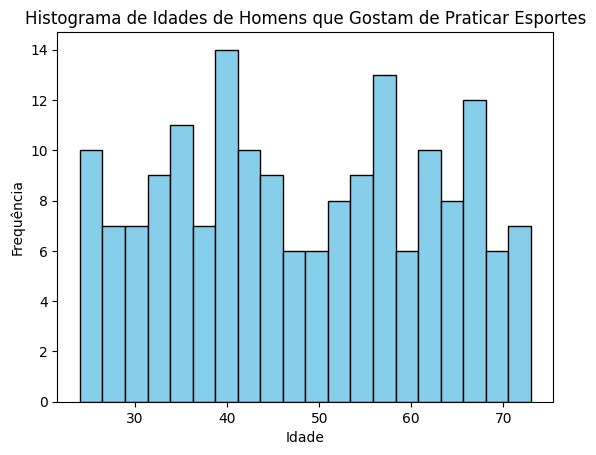

In [ ]:
import matplotlib.pyplot as plt

# Filtrar homens que gostam de praticar esportes
homens_praticando_esportes = df[(df['genero'] == 'Masculino') & (df['hobbies'] == 'Praticar esporte')]

# Criar o histograma
plt.hist(homens_praticando_esportes['idade'], bins=20, color='skyblue', edgecolor='black')

# Adicionar título e rótulos
plt.title('Histograma de Idades de Homens que Gostam de Praticar Esportes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()


Qual é a proporção entre homens e mulheres que têm afinidade por cachorros e cultivam o hábito de ler livros?

In [ ]:
df.columns

Index(['cod_pessoa', 'data_coleta', 'genero', 'data_nascimento',
       'animal_estimacao', 'clima', 'bebida_favorita', 'hobbies', 'idade'],
      dtype='object')

In [ ]:
# Filtrar homens e mulheres que têm afinidade por cachorros e cultivam o hábito de ler livros
filtro = (df['animal_estimacao'] == 'cachorro') & (df['hobbies'] == 'Ler livros')
homens_cachorro_leitura = df[(df['genero'] == 'Masculino') & filtro]
mulheres_cachorro_leitura = df[(df['genero'] == 'Feminino') & filtro]

# Calcular o número de homens e mulheres nesse grupo
num_homens = len(homens_cachorro_leitura)
num_mulheres = len(mulheres_cachorro_leitura)

# Calcular a proporção entre homens e mulheres
proporcao_homens_mulheres = num_homens / num_mulheres if num_mulheres != 0 else float('inf')

# Calcular a proporção em porcentagem
proporcao_porcentagem = proporcao_homens_mulheres * 100

# Imprimir os resultados
print("Proporção entre homens e mulheres que têm afinidade por cachorros e cultivam o hábito de ler livros:", proporcao_porcentagem)
print("Número de homens no grupo:", num_homens)
print("Número de mulheres no grupo:", num_mulheres)
print("Total de pessoas no grupo:", len(df[filtro]))

print(f'Porcentagem de mulheres: {num_mulheres/len(df[filtro]) * 100:.2f}% e Porcentagem de homens: {num_homens/len(df[filtro]) * 100:.2f}%')


Proporção entre homens e mulheres que têm afinidade por cachorros e cultivam o hábito de ler livros: 177.77777777777777
Número de homens no grupo: 32
Número de mulheres no grupo: 18
Total de pessoas no grupo: 50
Porcentagem de mulheres: 36.00% e Porcentagem de homens: 64.00%


Qual é a desvio padrão das idades das pessoas que têm como hobby assistir TV?

In [ ]:
# Filtrar pessoas que têm como hobby assistir TV
pessoas_assistindo_tv = df[df['hobbies'] == 'Assistir TV']

# Calcular o desvio padrão das idades dessas pessoas
desvio_padrao_idades = pessoas_assistindo_tv['idade'].std()

print("Desvio padrão das idades das pessoas que têm como hobby assistir TV:", desvio_padrao_idades)


Desvio padrão das idades das pessoas que têm como hobby assistir TV: 14.335914530241734
